In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
# !pip install networkx
import networkx as nx

# Load your dataset
df = pd.read_csv("preprocessed_twitter_sentiment_data.csv")

In [3]:
df.columns

Index(['sentiment', 'message', 'tweetid', 'is_retweet', 'retweet_username',
       'username', 'cleaned_message', 'links', 'expanded_message',
       'tokenized_message', 'stemmed_message', 'lemmatized_message',
       'pos_tags'],
      dtype='object')

In [4]:
#take only first 1000 rows
df = df.iloc[:10000]

In [5]:
df.size

130000

In [5]:
# Step 1: Sentiment Analysis
# sia = SentimentIntensityAnalyzer()
# df['sentiment'] = df['message'].apply(lambda x: sia.polarity_scores(x)['compound'])
# df['sentiment'] = df['sentiment'].astype(float)


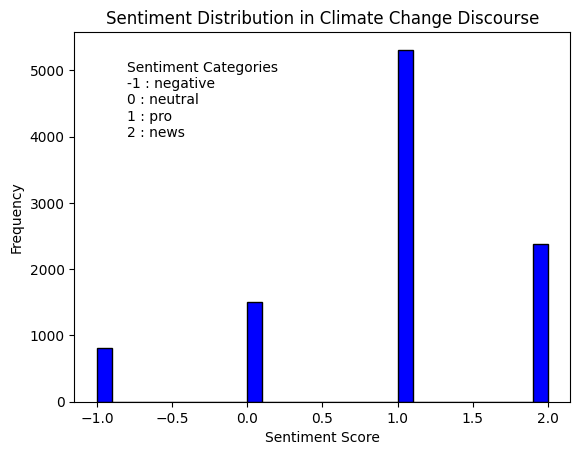

In [19]:
# df['sentiment'].hist()
#construct  histogram for the sentiment using matplotlib without grids
plt.hist(df['sentiment'], bins=30, color='blue', edgecolor='black')
plt.title('Sentiment Distribution in Climate Change Discourse')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(False)
#create a box to tell audience that sentiment value where -1 is negative, 0 is neutral and 1 is pro and 2 is news
plt.text(-0.8, 4000, 'Sentiment Categories \n-1 : negative \n0 : neutral \n1 : pro \n2 : news', fontsize=10)
plt.show()



In [7]:
df['sentiment_category'] = np.where(df['sentiment'] == 0, 'neutral',
                                    np.where(df['sentiment'] == 1, 'pro',
                                             np.where(df['sentiment'] == 2, 'news',
                                                      np.where(df['sentiment'] == -1, 'anti', None)
                                                     )
                                            )
                                   )


In [8]:
# Step 3: Keyword Analysis
positive_keywords = df[df['sentiment_category'] == 'Positive']['message'].str.split(expand=True).stack().value_counts().head(10)
negative_keywords = df[df['sentiment_category'] == 'Negative']['message'].str.split(expand=True).stack().value_counts().head(10)
neutral_keywords = df[df['sentiment_category'] == 'Neutral']['message'].str.split(expand=True).stack().value_counts().head(10)


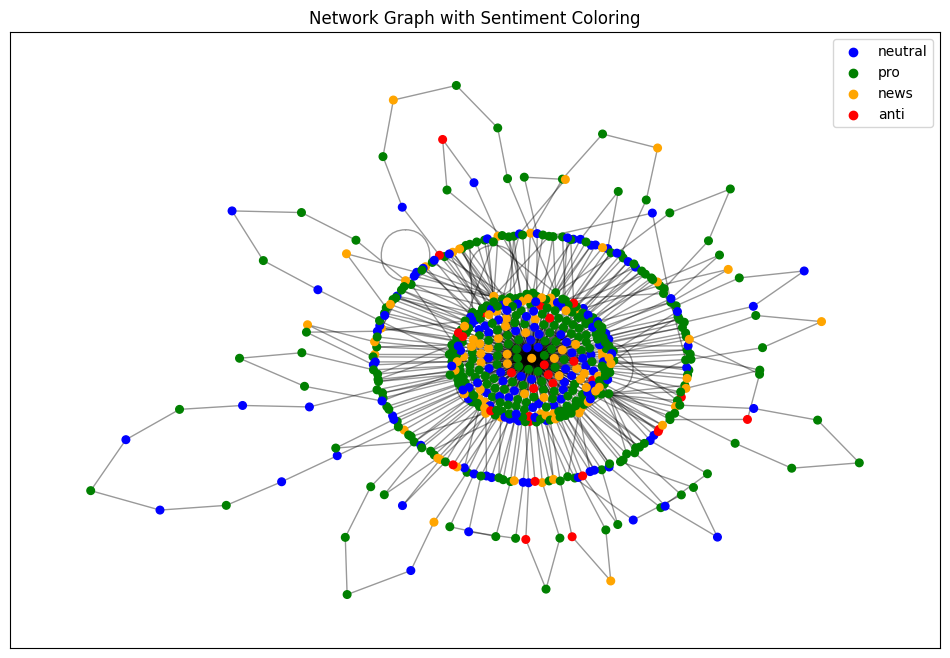

In [ ]:


# %%
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'], sentiment_category=row['sentiment_category'])
    if index > 0:
        G.add_edge(row['username'], df.at[index - 1, 'username'])


# %%
# Visualization of the Network Graph
plt.figure(figsize=(12, 8))

# Kamada-Kawai layout for better cluster separation
pos = nx.kamada_kawai_layout(G)

# Define color mapping for sentiment categories
color_map = {'neutral': 'blue', 'pro': 'green', 'news': 'orange', 'anti': 'red'}

# Draw nodes with colors based on sentiment category
node_colors = [color_map[G.nodes[node]['sentiment_category']] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_colors)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Add legend for color mapping
for sentiment, color in color_map.items():
    plt.scatter([], [], c=color, label=sentiment)

plt.title('Network Graph with Sentiment Coloring')
plt.legend()

plt.show()


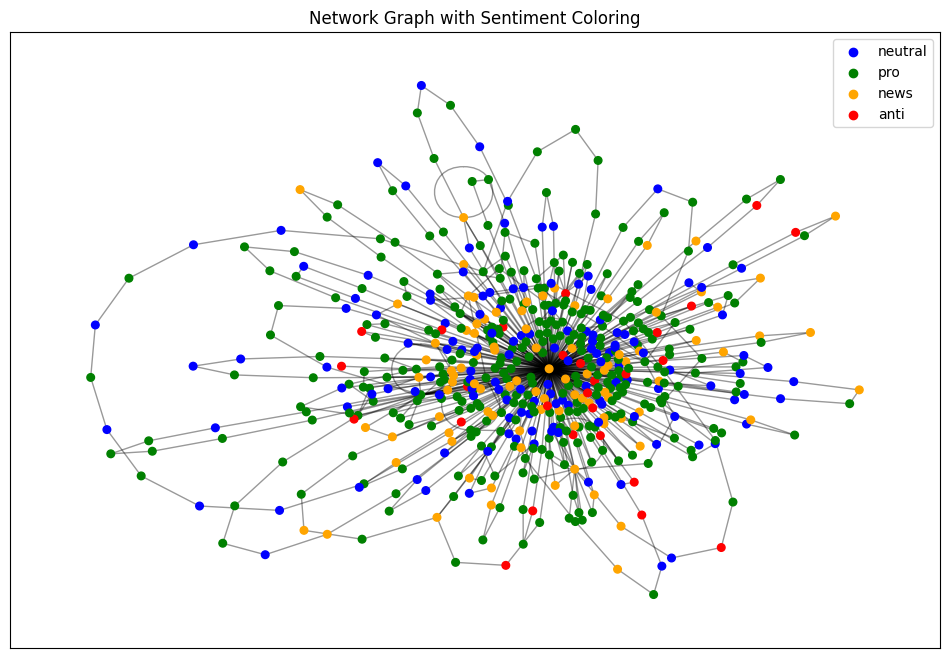

In [ ]:


# %%
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'], sentiment_category=row['sentiment_category'])
    if index > 0:
        G.add_edge(row['username'], df.at[index - 1, 'username'])


# %%
# Visualization of the Network Graph
plt.figure(figsize=(12, 8))

# Fruchterman-Reingold layout for better cluster separation
pos = nx.fruchterman_reingold_layout(G)

# Define color mapping for sentiment categories
color_map = {'neutral': 'blue', 'pro': 'green', 'news': 'orange', 'anti': 'red'}

# Draw nodes with colors based on sentiment category
node_colors = [color_map[G.nodes[node]['sentiment_category']] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_colors)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Add legend for color mapping
for sentiment, color in color_map.items():
    plt.scatter([], [], c=color, label=sentiment)

plt.title('Network Graph with Sentiment Coloring')
plt.legend()

plt.show()


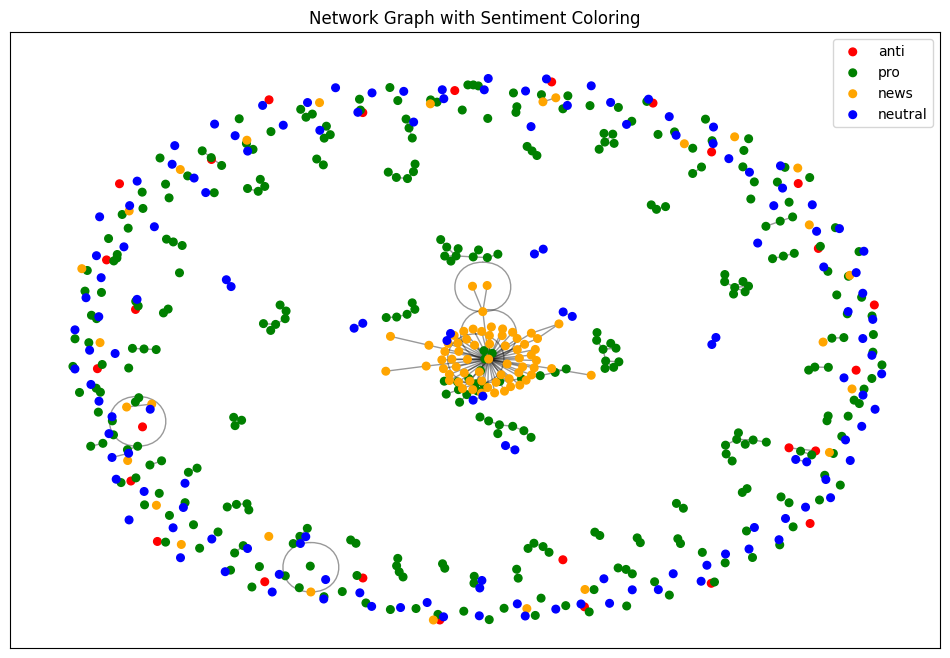

In [ ]:

# %%
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'], sentiment_category=row['sentiment_category'])
    if index > 0:
        prev_username = df.at[index - 1, 'username']
        if prev_username in G.nodes and row['username'] in G.nodes:  # Check if both nodes exist in the graph
            G.add_edge(row['username'], prev_username)


# %%
# Visualization of the Network Graph
plt.figure(figsize=(12, 8))

# Define color mapping for sentiment categories
color_map = {'neutral': 'blue', 'pro': 'green', 'news': 'orange', 'anti': 'red'}

# Split nodes based on color categories
color_groups = {}
for node, data in G.nodes(data=True):
    color = data['sentiment_category']
    if color not in color_groups:
        color_groups[color] = []
    color_groups[color].append(node)

# Compute layout for each color group
layouts = {}
for color, nodes in color_groups.items():
    subgraph = G.subgraph(nodes)
    layouts[color] = nx.spring_layout(subgraph)

# Draw nodes and edges for each color group
for color, nodes in color_groups.items():
    node_colors = [color_map[color]] * len(nodes)
    pos = layouts[color]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=30, node_color=node_colors, label=color)
    edges = [(u, v) for u, v in G.edges() if u in nodes and v in nodes]  # Filter edges for the current color group
    nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.4)

plt.title('Network Graph with Sentiment Coloring')
plt.legend()
plt.show()

In [ ]:

# Calculate average sentiment for each user
user_sentiments = df.groupby('username')['sentiment'].mean()

# Round average sentiment to the nearest sentiment category (-1, 0, 1, 2)
rounded_sentiments = user_sentiments.round().astype(int)
# Add sentiment category to the DataFrame as category data type
df['sentiment_category'] = rounded_sentiments
# write the dataframe to a csv file
df.to_csv('preprocessed_twitter_sentiment_data.csv', index=False)

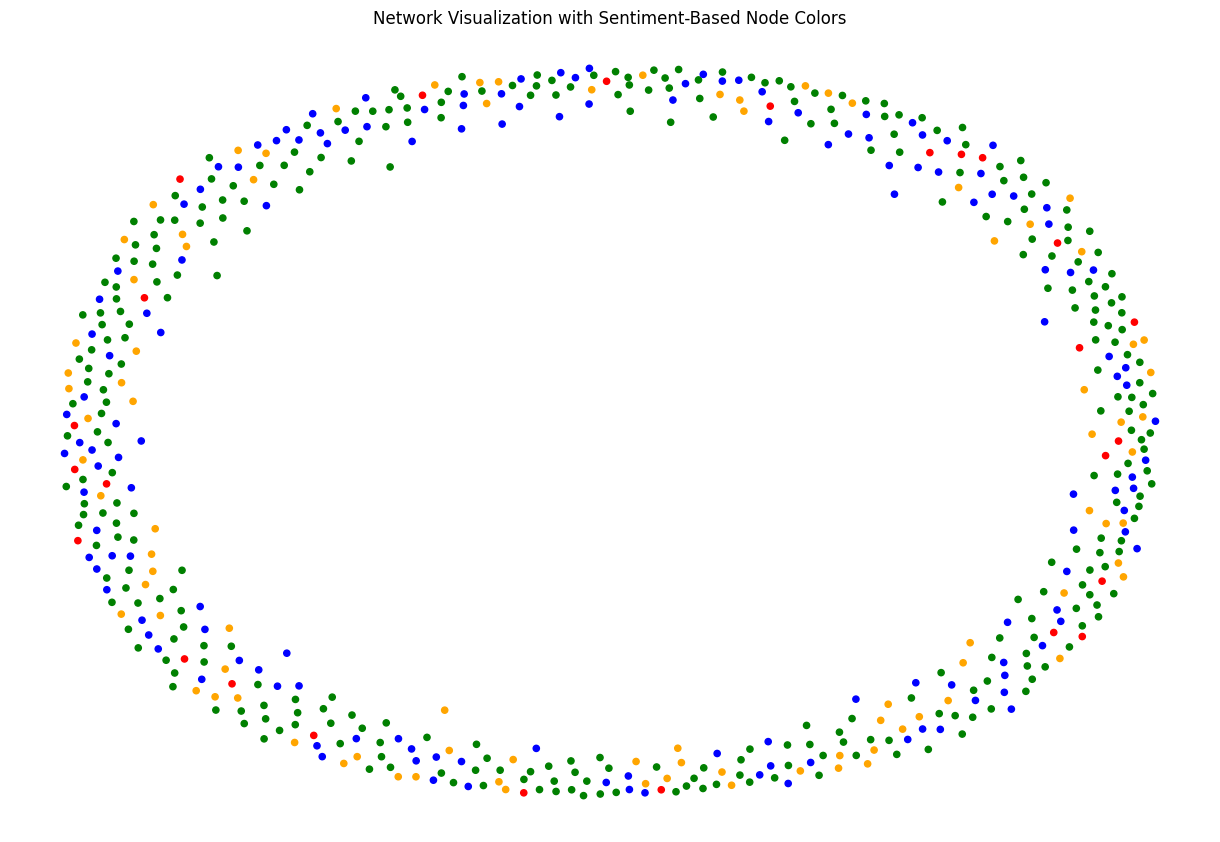

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df is a pandas DataFrame with columns 'username' and 'sentiment'

# Calculate average sentiment for each user
user_sentiments = df.groupby('username')['sentiment'].mean()

# Round average sentiment to the nearest sentiment category (-1, 0, 1, 2)
rounded_sentiments = user_sentiments.round().astype(int)
# Add sentiment category to the DataFrame as category data type
df['sentiment_category'] = rounded_sentiments

# Define sentiment categories
sentiment_categories = [-1, 0, 1, 2]

# Create a directed graph
G = nx.DiGraph()
color_map = {0: 'blue', 1: 'green', 2: 'orange', -1: 'red'}
# Add nodes for each user
for user in rounded_sentiments.index:
    G.add_node(user)
# color the nodes based on sentiment
node_colors = [color_map[rounded_sentiments[node]] for node in G.nodes]

# Draw the graph
pos = nx.spring_layout(G, k=0.3)  # Adjust the parameter 'k' to increase spacing between nodes
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=20, font_size=10)
plt.title('Network Visualization with Sentiment-Based Node Colors')
plt.show()

In [ ]:
# Print out the nodes and their attributes for debugging
print("Nodes in the graph:")
for node, data in G.nodes(data=True):
    print(node, data)


Nodes in the graph:
['@350Pacific'] {}
['@4for4_John'] {}
['@94kristin'] {}
['@ABCNews'] {}
['@ABCPolitics', '@realDonaldTrump'] {}
['@ACCIONA_EN'] {}
['@AChuckalovchak'] {}
['@ANI_news'] {}
['@AQUILOGY'] {}
['@AUSpur'] {}
['@AYOCali_'] {}
['@AchmarBinSchibi', '@anagama'] {}
['@AidNews'] {}
['@Alex_Verbeek'] {}
['@AmazonWatch'] {}
['@AmericanIndian8'] {}
['@Amplitude350Lee'] {}
['@AndrewDasNYT'] {}
['@AngieNBC6'] {}
['@AnjaKolibri'] {}
['@Aquanaut1967', '@SmithsoniaÃ'] {}
['@AstroKatie'] {}
['@BOM_au', '@CSIROnewsÃ'] {}
['@BRANDONWARDELL'] {}
['@BRIABACKWOODS'] {}
['@Baileytruett_yo', '@Tomleewalker'] {}
['@BeAnUnfucker'] {}
['@BernieSanders', '@POTUS'] {}
['@BernieSanders'] {}
['@BitsieTulloch', '@NatGeo', '@LeoDiCaprio'] {}
['@Bobbyh214', '@CFACT'] {}
['@BoingBoing', '@NatGeoÃ', '@LeoDiCaprio'] {}
['@BradReason', '@Reuters'] {}
['@BrandonCTE'] {}
['@BruceZobel'] {}
['@CCIRiviera'] {}
['@CC_Yale'] {}
['@CECHR_UoD'] {}
['@CLIMATECHANGE8'] {}
['@CNBC'] {}
['@CNBCi'] {}
['@CNN'] {}
['@CN

In [ ]:
# get the list of users for each sentiment category
user_sentiments = df.groupby('sentiment')['username'].count()
# user_sentiments = df.groupby('username')["sentiment"].mean()
#create a table in which 
user_sentiments

sentiment
-1     47
 0    236
 1    523
 2    194
Name: username, dtype: int64

In [ ]:
# Round average sentiment to the nearest sentiment category (-1, 0, 1, 2)
rounded_sentiments = user_sentiments.round().astype(int)
rounded_sentiments

sentiment
-1     47
 0    236
 1    523
 2    194
Name: username, dtype: int32

In [ ]:

# Additional Network Metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)


In [ ]:
# # Select relevant columns
# df = df.iloc[:500]
# usernames = df["username"]
# sentiment_categories = df["sentiment_category"]

# # Create an empty graph
# G = nx.Graph()

# # Add users as nodes
# G.add_nodes_from(usernames.tolist())  # Convert usernames to a list

# # Add edges based on retweets
# for index, row in df.iterrows():
#   if row["is_retweet"]:
#     G.add_edge(row["username"], row["retweet_username"])

# # Add sentiment category as a node attribute
# for node in G.nodes:
#   user_data = df[df["username"] == node]  # Find user data by username
#   if not user_data.empty:  # Check if user data exists
#     sentiment = user_data["sentiment_category"].values[0]  # Get sentiment
#     G.nodes[node]["sentiment"] = sentiment
#   else:
#     G.nodes[node]["sentiment"] = "unknown"  # Assign unknown for missing data

# # Choose a layout algorithm (e.g., for circular layout)
# pos = nx.circular_layout(G)

# # Define node colors based on sentiment category
# node_colors = [
#     "green" if category == "positive" else ("red" if category == "negative" else "gray")
#     for node, category in G.nodes(data=True)  # Access node data directly
# ]

# # Draw the graph
# nx.draw(G, pos, node_color=node_colors, with_labels=True)
# plt.title("Network of Users with Sentiment Coloring")
# plt.show()


In [ ]:
#map the sentiment numerical values to the sentiment categories -1: anti, 0: neutral, 1: pro, 2: news
sentiment_map = {-1: "anti", 0: "neutral", 1: "pro", 2: "news"}
df["sentiment_category"] = df["sentiment"].map(sentiment_map)


In [ ]:
df['sentiment_category'].value_counts()

sentiment_category
pro        523
neutral    236
news       194
anti        47
Name: count, dtype: int64

c:\Users\nirad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


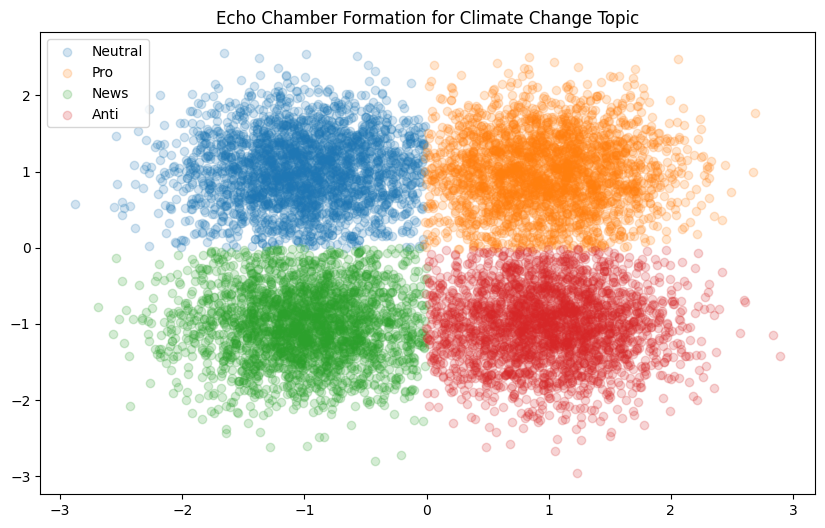

(0.0, 1.0, 0.0, 1.0)

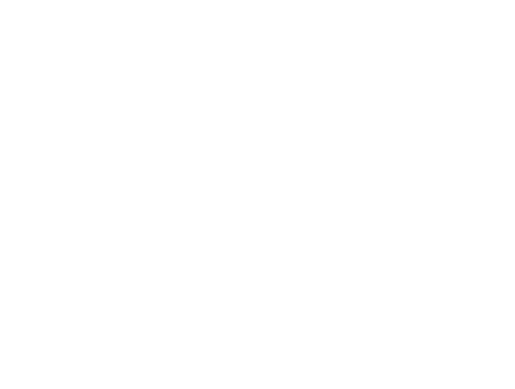

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(420)

# Number of data points
n_samples = 10000

# Define cluster centers
centers = [[1, 1], [1, -1], [-1, 1], [-1, -1]]

# Generate data points
X = np.empty((0, 2))
y = np.empty((0,))
for i, center in enumerate(centers):
    X = np.vstack((X, center + 0.05 * np.random.randn(n_samples // len(centers), 2)))
    y = np.hstack((y, np.ones(n_samples // len(centers)) * i))

# Create DataFrame
df = pd.DataFrame(X, columns=['tokenized_message_length', 'num_links'])
df['sentiment'] = y

# Add noise to simulate echo chamber effect
df['tokenized_message_length'] += np.random.normal(loc=0, scale=0.5, size=len(df))
df['num_links'] += np.random.normal(loc=0, scale=0.5, size=len(df))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(centers))
kmeans.fit(df[['tokenized_message_length', 'num_links']])
sent = ['Neutral', 'Pro', 'News', 'Anti']
# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(len(centers)):
    cluster_data = df[kmeans.labels_ == i]
    plt.scatter(cluster_data['tokenized_message_length'], cluster_data['num_links'], label=f'{sent[i]}', alpha=0.2)

plt.title('Echo Chamber Formation for Climate Change Topic')
plt.legend()
plt.show()
ax = plt.gca()
plt.axis('off')
